<a href="https://colab.research.google.com/github/praneethweerawardana/Image-Classification-CNN-Deep-learning-projects/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow  as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [7]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

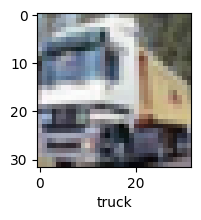

In [13]:
plot_sample(X_train, y_train, 1)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8128 - accuracy: 0.3567
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6277 - accuracy: 0.4231
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5451 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4846 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4353 - accuracy: 0.4961


In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      1000
           1       0.65      0.57      0.61      1000
           2       0.34      0.38      0.36      1000
           3       0.39      0.24      0.30      1000
           4       0.45      0.37      0.41      1000
           5       0.36      0.45      0.40      1000
           6       0.39      0.76      0.51      1000
           7       0.72      0.36      0.48      1000
           8       0.56      0.68      0.61      1000
           9       0.68      0.38      0.49      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 4ms/step - loss: 1.4881 - accuracy: 0.4672
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1278 - accuracy: 0.6054
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9982 - accuracy: 0.6521
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9110 - accuracy: 0.6824
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8439 - accuracy: 0.7059
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7908 - accuracy: 0.7245
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7474 - accuracy: 0.7390
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7030 - accuracy: 0.7551
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6644 - accuracy: 0.7678
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.62

In [23]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 2s 4ms/step - loss: 0.9473 - accuracy: 0.6923


[0.9472642540931702, 0.692300021648407]

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[7.72666390e-05, 4.19235555e-04, 1.37531082e-04, 9.93169427e-01,
        9.52675782e-06, 4.72492725e-03, 1.15978578e-03, 9.15639987e-07,
        2.96471961e-04, 4.80794824e-06],
       [1.17932947e-03, 1.92185208e-01, 1.94923288e-07, 1.87749848e-07,
        3.57120712e-07, 3.21874749e-09, 2.31431429e-07, 2.98641197e-07,
        8.02161276e-01, 4.47286339e-03],
       [1.43743351e-01, 3.39022636e-01, 6.39396859e-03, 1.02681015e-02,
        5.89782023e-04, 6.47266803e-04, 3.30272480e-04, 6.00174488e-03,
        1.86892301e-01, 3.06110620e-01],
       [8.48171532e-01, 3.28336377e-03, 2.95472005e-03, 1.15788527e-04,
        7.14973453e-03, 1.32648427e-06, 1.45407364e-04, 1.08742970e-04,
        1.37968332e-01, 1.01165868e-04],
       [1.23381966e-07, 1.48638555e-05, 9.21836705e-04, 2.10514888e-02,
        8.30633640e-02, 3.61178274e-04, 8.94586265e-01, 6.39097152e-07,
        2.06846323e-07, 1.90564382e-08]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

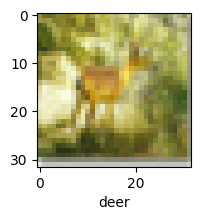

In [28]:
plot_sample(X_test, y_test,500)